# Семинар 5. Метод опорных векторов. Калибровка вероятностей.

# Коваленков Дмитрий, задание 4

### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации. 

SVM с каким ядром дал лучший результат?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_lfw_people

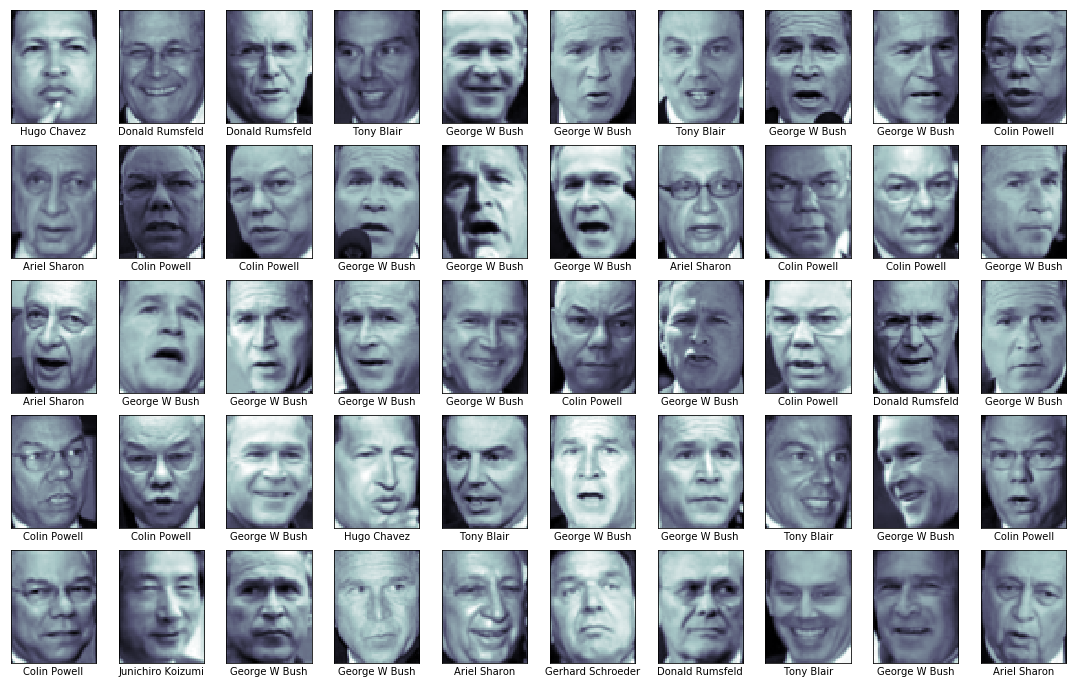

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

## Глянем данные
fig, ax = plt.subplots(5, 10, figsize=(19,12))
for i, axi in enumerate(ax.flat):
    i += 25 
    axi.imshow(faces['images'][i], cmap='bone')
    axi.set(xticks = [],yticks=[],
            xlabel=faces['target_names'][faces['target'][i]])

In [3]:
X = faces['data']
y = faces['target']


pca = PCA(n_components = 150, svd_solver='randomized', whiten = True, random_state = 1108)
svc = SVC(class_weight='balanced')
svc = make_pipeline(pca, svc)

param_grid = {'svc__kernel': ['rbf', 'poly', 'sigmoid']}
grid_svc = GridSearchCV(svc, param_grid=param_grid, cv = 5)

grid_svc.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=1108,
  svd_solver='randomized', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__kernel': ['rbf', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [4]:
grid_svc.best_params_

{'svc__kernel': 'rbf'}

In [5]:
grid_svc.best_score_

0.8271513353115727

In [6]:
xtr, x1, ytr, y1 = train_test_split(X, y, random_state = 1108)
grid_svc.best_estimator_.fit(xtr, ytr)
print(classification_report(y1, grid_svc.best_estimator_.predict(x1), target_names=faces['target_names']))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.79      0.88        19
     Colin Powell       0.62      0.95      0.75        55
  Donald Rumsfeld       1.00      0.79      0.88        28
    George W Bush       0.90      0.93      0.92       136
Gerhard Schroeder       0.96      0.76      0.85        33
      Hugo Chavez       1.00      0.60      0.75        15
Junichiro Koizumi       1.00      0.63      0.77        19
       Tony Blair       0.93      0.81      0.87        32

        micro avg       0.85      0.85      0.85       337
        macro avg       0.93      0.78      0.83       337
     weighted avg       0.89      0.85      0.86       337



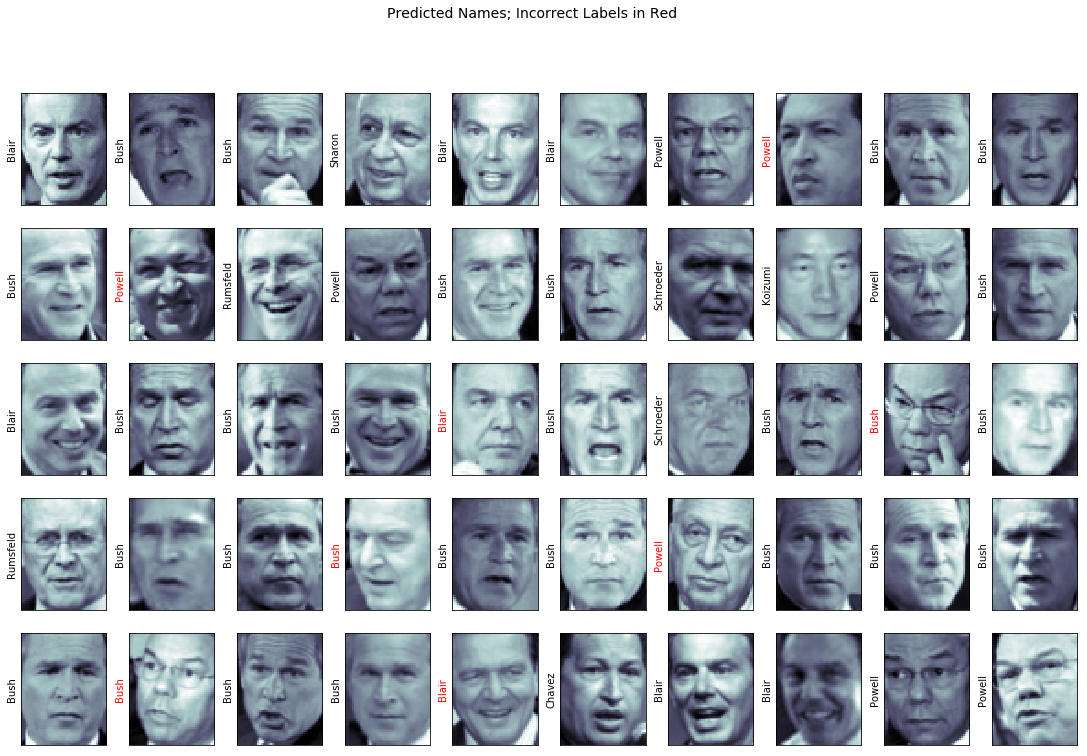

In [7]:
yfit = grid_svc.best_estimator_.predict(x1)

fig, ax = plt.subplots(5, 10, figsize=(19,12))
for i, axi in enumerate(ax.flat):
    i += 20
    axi.imshow(x1[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces['target_names'][yfit[i]].split()[-1],
                   color='black' if yfit[i] == y1[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# Ответ - Лучшая модель с ядром 'rbf'

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced').

Какое качество показала эта модель?

In [8]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components = 150, svd_solver='randomized', whiten = True, random_state = 1108)
logit = LogisticRegression(class_weight='balanced')

logit_pipe = make_pipeline(pca, logit)

param_grid = {'logisticregression__C': np.logspace(-3,3,7)}
grid_logit = GridSearchCV(logit_pipe, param_grid=param_grid, cv = 5)

grid_logit.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=1108,
  svd_solver='randomized', tol=0.0, whiten=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
grid_logit.best_params_

{'logisticregression__C': 0.01}

In [10]:
grid_logit.best_score_

0.827893175074184

In [11]:
xtr, x1, ytr, y1 = train_test_split(X, y, random_state = 1108)
grid_logit.best_estimator_.fit(xtr, ytr)
print(classification_report(y1, grid_logit.best_estimator_.predict(x1), target_names=faces['target_names']))

                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.89      0.83        19
     Colin Powell       0.77      0.85      0.81        55
  Donald Rumsfeld       0.70      0.82      0.75        28
    George W Bush       0.96      0.87      0.91       136
Gerhard Schroeder       0.84      0.79      0.81        33
      Hugo Chavez       0.75      0.80      0.77        15
Junichiro Koizumi       0.75      0.79      0.77        19
       Tony Blair       0.87      0.84      0.86        32

        micro avg       0.85      0.85      0.85       337
        macro avg       0.80      0.83      0.81       337
     weighted avg       0.85      0.85      0.85       337



In [12]:
## Немножко лучше, чем SVC классификатор, в данном случае

### Задание 3.

Сгенерируйте 100 точек для задачи двухклассовой классификации с помощью датасета make_moons https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html.

Используйте параметр noise=0.1.

Подберите тип ядра в методе SVM и значение параметра C, чтобы добиться (визуально) безошибочной классификации.

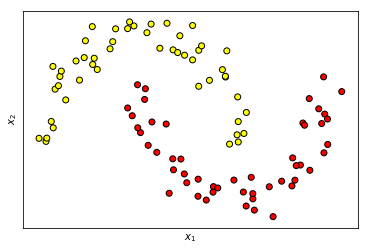

In [13]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.metrics import accuracy_score

X, y = make_moons(noise = 0.1, random_state=1108)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xticks([])
plt.yticks([])
plt.scatter(X[:, 0], X[:, 1], 
            color = ['red' if yy == 1 else 'yellow' for yy in y], lw = 1, edgecolors='k')


In [14]:
param_grid = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 
             'C': np.logspace(-3,3,7),
             'degree': [2,3,4]}

svc = GridSearchCV(SVC(class_weight= 'balanced', probability=True), param_grid=param_grid, cv = 5, scoring='roc_auc')

svc.fit(X, y)

svc.best_params_

{'C': 10.0, 'degree': 2, 'kernel': 'rbf'}

In [15]:
svc.best_score_

1.0

In [16]:
xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 0.1, X[:,0].max() + 0.1), 
                     np.linspace(X[:,1].min() - 0.1, X[:,1].max() + 0.1))
Z = svc.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:,0]
Z = Z.reshape(xx.shape)

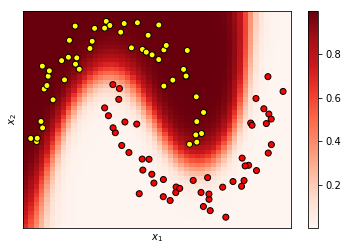

In [17]:
plt.imshow(Z,cmap = 'Reds', extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          aspect='auto', origin = 'lower')
plt.colorbar()

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xticks([])
plt.yticks([])
plt.scatter(X[:, 0], X[:, 1], 
            color = ['red' if yy == 1 else 'yellow' for yy in y], lw = 1, edgecolors='k')



### Визуально безошибочная классификация ^

# Калибровка вероятностей

https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/

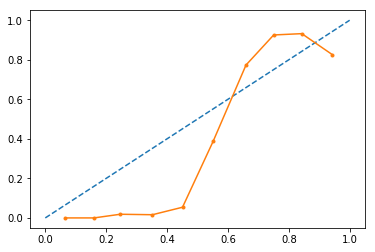

In [18]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

model = SVC()
model.fit(trainX, trainy)

probs = model.decision_function(testX)

fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)

pyplot.plot([0, 1], [0, 1], linestyle='--')

pyplot.plot(mpv, fop, marker='.')
pyplot.show()

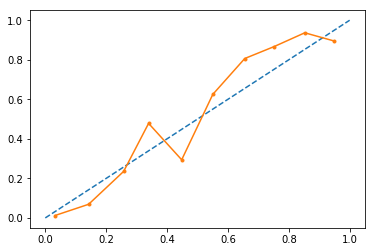

In [19]:
from sklearn.calibration import CalibratedClassifierCV

model = SVC()
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(trainX, trainy)

probs = calibrated.predict_proba(testX)[:, 1]

fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)

pyplot.plot([0, 1], [0, 1], linestyle='--')

pyplot.plot(mpv, fop, marker='.')
pyplot.show()

### Задание 4.

Заново решите задачу классификации точек, сгенерированных с помощью метода make_circles.

1) Разбейте данные на train и test. Обучите SVM на train и сделайте предсказание вероятностей на test.
Нарисуйте calibration_curve.

2) Затем откалибруйте предсказания классификатора и нарисуйте полученную calibration curve.

In [20]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

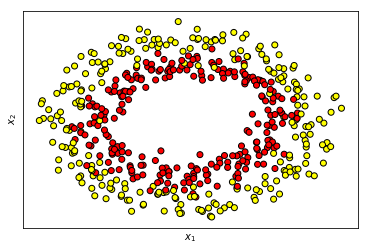

In [21]:
X, y = make_circles(noise=0.1, factor=.7, n_samples=500, random_state=1108)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xticks([])
plt.yticks([])
plt.scatter(X[:, 0], X[:, 1], 
            color = ['red' if yy == 1 else 'yellow' for yy in y], lw = 1, edgecolors='k')

1) Разбейте данные на train и test. Обучите SVM на train и сделайте предсказание вероятностей на test. Нарисуйте calibration_curve.

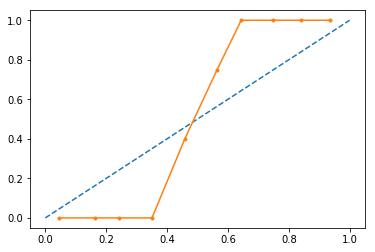

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 1108)

clf = SVC(class_weight='balanced', probability=True)
clf.fit(xtrain, ytrain)
yfit = clf.predict(xtest)

probs = clf.decision_function(xtest)

fop, mpv = calibration_curve(ytest, probs, n_bins=10, normalize=True)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(mpv, fop, marker='.')
plt.show()

2) Затем откалибруйте предсказания классификатора и нарисуйте полученную calibration curve.

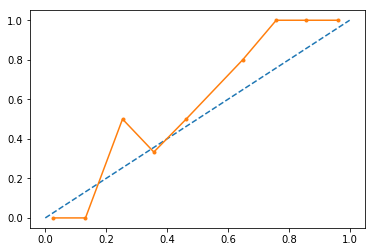

In [23]:
clf = SVC(class_weight='balanced', probability=True)

calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=5)
calibrated.fit(xtrain, ytrain)

probs = calibrated.predict_proba(xtest)[:, 1]

fop, mpv = calibration_curve(ytest, probs, n_bins=10, normalize=True)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(mpv, fop, marker='.')
plt.show()

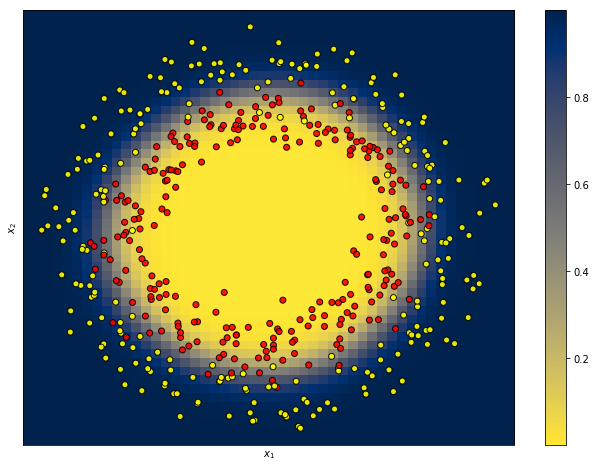

In [24]:
xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 0.1, X[:,0].max() + 0.1), 
                     np.linspace(X[:,1].min() - 0.1, X[:,1].max() + 0.1))
Z = calibrated.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:,0]
Z = Z.reshape(xx.shape)

plt.imshow(Z,cmap = 'cividis_r', extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          aspect='auto', origin = 'lower')
plt.colorbar()

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xticks([])
plt.yticks([])
plt.scatter(X[:, 0], X[:, 1], color = ['Red' if yy == 1 else 'yellow' for yy in y], lw = 1, edgecolors='k', alpha = .9)
fig = plt.gcf()
fig.set_size_inches(11,8)